# [Health care and Stroke](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset) **(Exploratory Data Analysis)**:

---

## Some information about the attributes:
- **id:**   unique identifier
- **gender:**   "Male", "Female" or "Other"
- **age:**  age of the patient
- **hypertension:** 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
- **heart_disease:**    0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
- **ever_married:** "No" or "Yes"
- **work_type:**    "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
- **Residence_type:**   "Rural" or "Urban"
- **avg_glucose_level:**    average glucose level in blood
- **bmi:**  body mass index
- **smoking_status:**   "formerly smoked", "never smoked", "smokes" or "Unknown"*
- **stroke:**   1 if the patient had a stroke or 0 if not

**Note:** "Unknown" in smoking_status means that the information is unavailable for this patient

---


## Basic Steps:
- Import libraries
- Load data set

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import os
from sklearn.model_selection import train_test_split 

In [19]:
df = pd.read_csv('stroke_data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


---

## Getting to know Data:

In [20]:
df.shape
print('Number of rows:', df.shape[0])
print('Number of columns:', df.shape[1])

Number of rows: 5110
Number of columns: 12


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [22]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


---

## Cleaning the data:

- The first step is to remove the id column as we do not require it.

In [23]:
df = df.drop(columns=['id'])

- The age column seems to include floats but should have integers.

In [48]:
df['age'] = df['age'].astype(np.int64)

- Let's make the unknown BMIs equal the gender-specific mean.

In [56]:
male_data = df[df['gender'] == 'Male']
female_data = df[df['gender'] == 'Female']

male_data['bmi'].fillna(male_data['bmi'].mean(), inplace=True)
female_data['bmi'].fillna(female_data['bmi'].mean(), inplace=True)

df = pd.concat([male_data, female_data])

C:\Users\thech\AppData\Local\Temp\ipykernel_13708\1120971886.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\thech\AppData\Local\Temp\ipykernel_13708\1120971886.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



- Perfect! Now lets visualize the data.

---

## Visualizing the data:

- [Legend explanation of distribution of categorical variables:](#some-information-about-the-attributes)

In [54]:
fig = make_subplots(
    rows=4, cols=2, subplot_titles=('<b>Distribution Of Gender<b>','<b>Distribution Of Hypertension<b>','<b>Distribution Of Heart Diseases<b>',
                                   '<b>Distribution Of Marriage<b>','<b>Distribution Of Work Type<b>', '<b>Distribution Of Residence Type<b>', '<b>Distribution Of Smoking Status<b>'),
    vertical_spacing=0.01,
    specs=[[{"type": "pie"}       ,{"type": "pie"}] ,
           [{"type": "pie"}       ,{"type": "pie"}] ,
           [{"type": "pie"}       ,{"type": "pie"}] ,
           [{"type": "pie"}       ,None]]
)
fig.add_trace(
    go.Pie(values=df.gender.value_counts().values,labels=['<b>Female<b>','<b>Male<b>','<b>Other<b>'],
           hole=0.3,pull=[0,0.08,0.2],marker_colors=['pink','lightblue','black'],textposition='inside'),
    row=1, col=1
)

fig.add_trace(
    go.Pie(values=df.hypertension.value_counts().values,labels=['<b>1<b>','<b>0<b>'],
           
           hole=0.3,pull=[0,0.08,0.3],marker_colors=['#393E46', '#2BCDC1', '#F66095'],textposition='inside'),
    row=1, col=2
)


fig.add_trace(
    go.Pie(values=df.heart_disease.value_counts().values,labels=['<b>1<b>','<b>0<b>'],
           hole=0.3,pull=[0,0.08,0.3],marker_colors=['rgb(0, 0, 100)', 'rgb(0, 200, 200)'],textposition='inside'),
    row=2, col=1
)

fig.add_trace(
    go.Pie(values=df.ever_married.value_counts().values,labels=['<b>Yes<b>','<b>No<b>'],
           hole=0.3,pull=[0,0.08,0.3],marker_colors=['slategray', 'magenta'],textposition='inside'),
    row=2, col=2
)

fig.add_trace(
    go.Pie(values=df.work_type.value_counts().values,labels=['<b>Private<b>', '<b>Self-employed<b>', '<b>Govt_job<b>', '<b>children<b>', '<b>Never_worked<b>'],
           hole=0.3,pull=[0,0.08,0.08,0.08,0.2],marker_colors=['#394a51', '#7fa99b','#fbf2d5','#fdc57b', '#ff7e67'],textposition='inside'),
    row=3, col=1
    
)
fig.add_trace(
    go.Pie(values=df.Residence_type.value_counts().values,labels=['<b>Urban<b>', '<b>Rural<b>'],
           hole=0.3,pull=[0,0.08,0.5],marker_colors=['#962071', '#76b39d'],textposition='inside'),
    row=4, col=1
) 

fig.add_trace(
    go.Pie(values=df.smoking_status.value_counts().values,labels=[ '<b>formerly smoked<b>', '<b>never smoked<b>', '<b>smokes<b>', '<b>Unknown<b>'],
           hole=0.3,pull=[0,0.08,0.06,0.06],marker_colors=['#3c4245', '#5f6769','#719192','#dfcdc3'],textposition='inside'),
    row=3, col=2
) 
    
fig.update_layout(
    height=1200,
    showlegend=True,
    title_text="<b>Distribution of Categorical Varibles<b>",
)

fig.show()

- All illnesses seem to be more common for elderly patients:

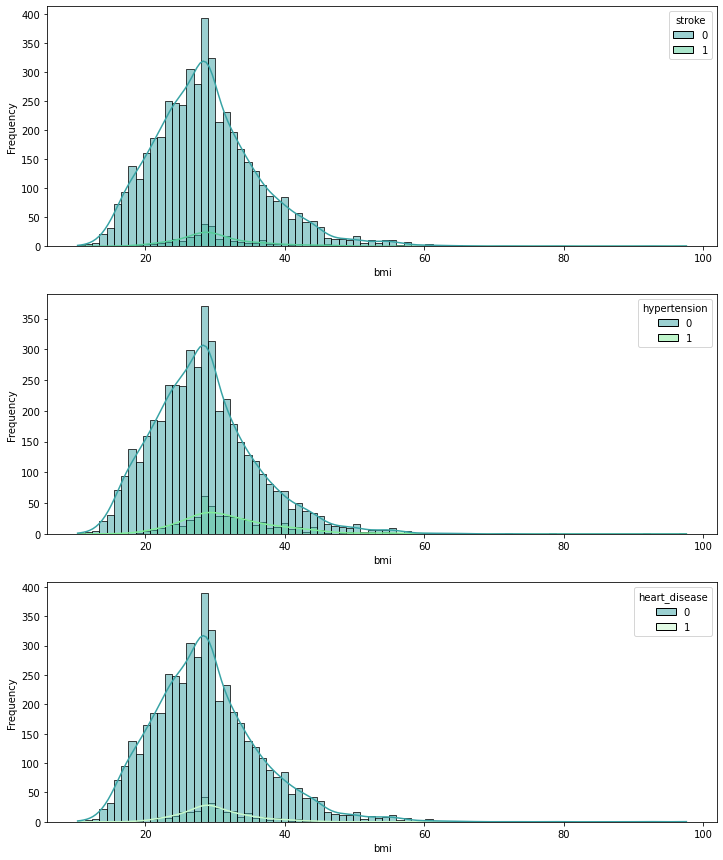

In [58]:
fig, ax = plt.subplots(3,1, figsize=(12,15))

sns.histplot(data=df, x='bmi', kde=True,hue='stroke',ax=ax[0], palette=[colors[1],colors[2]])
ax[0].set_ylabel("Frequency")

sns.histplot(data=df, x='bmi', kde=True,hue='hypertension',ax=ax[1], palette=[colors[1],colors[3]])
ax[1].set_ylabel("Frequency")

sns.histplot(data=df, x='bmi', kde=True,hue='heart_disease',ax=ax[2], palette=[colors[1],colors[4]])
ax[2].set_ylabel("Frequency")

colors = ["#22577A", "#38A3A5", "#57CC99", "#80ED99", "#C7F9CC"]

- People with high bmi tend to be more at risk than people with low BMI:

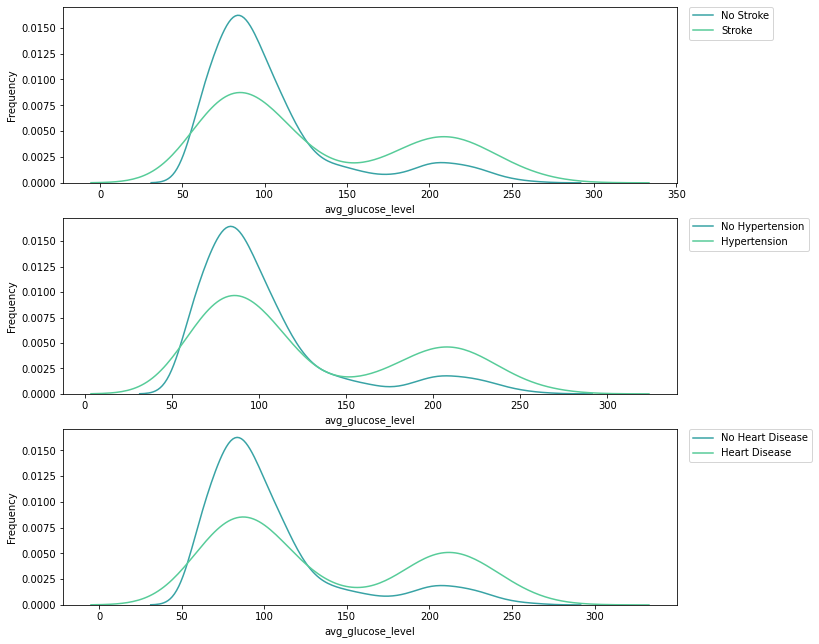

In [61]:
fig, ax = plt.subplots(3,1, figsize=(11,11))

sns.kdeplot(df[df['stroke']==0]['avg_glucose_level'],ax=ax[0], color=colors[1], label = 'No Stroke')
sns.kdeplot(df[df['stroke']==1]['avg_glucose_level'],ax=ax[0], color=colors[2], label = 'Stroke')

ax[0].set_ylabel("Frequency")
ax[0].legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

sns.kdeplot(df[df['hypertension']==0]['avg_glucose_level'],ax=ax[1], color=colors[1], label='No Hypertension')
sns.kdeplot(df[df['hypertension']==1]['avg_glucose_level'],ax=ax[1], color=colors[2], label = 'Hypertension')

ax[1].set_ylabel("Frequency")
ax[1].legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

sns.kdeplot(df[df['heart_disease']==0]['avg_glucose_level'],ax=ax[2], color=colors[1], label='No Heart Disease')
sns.kdeplot(df[df['heart_disease']==1]['avg_glucose_level'],ax=ax[2], color=colors[2], label='Heart Disease')

ax[2].set_ylabel("Frequency")
ax[2].legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.) 

- Visualization a Correlation between variables:

In [71]:
df_corr=df.corr()
fig = go.Figure()
fig.add_trace(
    go.Heatmap(
        x = df_corr.columns,
        y = df_corr.index,
        z = np.array(df_corr),
        colorscale="RdBu",
    )
)

fig.update_layout(
    height=600,
    width=800,
    showlegend=True,
    title_text="<b>Correlation Heatmap<b>",
)

fig.show()

---